#**Advance ML Homework_4_ DB Scan Clustering**
Simulasi tugas Mesin Learning Lanjut dengan Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
upload = files.upload()
import io
data = pd.read_csv(io.BytesIO(upload['Dataset.csv']))
data.head(20)

Saving Dataset.csv to Dataset.csv


,ID,X,Y
0,A,2,2
1,B,2,3
2,C,4,3
3,D,1,4
4,E,6,4
5,F,3,5
6,G,4,6
7,H,2,8
8,I,4,7
9,J,5,9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      26 non-null     object
 1   X       26 non-null     int64 
 2   Y       26 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 752.0+ bytes


In [4]:
x = data.loc[:, ['X',
                 'Y']].values

In [6]:
x=data.iloc[:,[1,2]].values
x.shape

(26, 2)

In [8]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=5,min_samples=4,metric='euclidean')

In [9]:
model=db.fit(x)
label=model.labels_
label

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  1,  1,  1, -1, -1, -1])

In [10]:
from sklearn import metrics

sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Jumlah Cluster
n_clusters=len(set(label))- (1 if -1 in label else 0)
print('Jumlah Cluster:',n_clusters)

Jumlah Cluster: 2


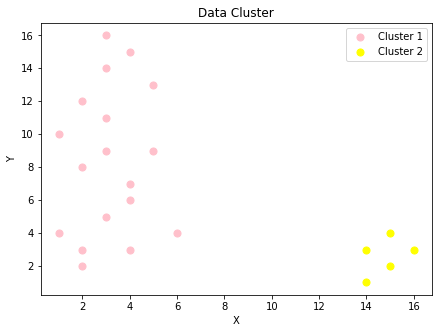

In [11]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink', label='Cluster 1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow', label='Cluster 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Cluster')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()